In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Avgtemp.csv')

In [45]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")

In [46]:
train, test = df[:-12], df[-12:]

In [47]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [48]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [49]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [50]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
38/38 [==============================] - 0s 6ms/step - loss: 0.1259
Epoch 2/90
38/38 [==============================] - 0s 5ms/step - loss: 0.0641
Epoch 3/90
38/38 [==============================] - 0s 5ms/step - loss: 0.0242
Epoch 4/90
38/38 [==============================] - 0s 5ms/step - loss: 0.0113
Epoch 5/90
38/38 [==============================] - 0s 5ms/step - loss: 0.0097
Epoch 6/90
38/38 [==============================] - 0s 5ms/step - loss: 0.0135
Epoch 7/90
38/38 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 8/90
38/38 [==============================] - 0s 5ms/step - loss: 0.0114
Epoch 9/90
38/38 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 10/90
38/38 [==============================] - 0s 5ms/step - loss: 0.0071
Epoch 11/90
38/38 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 12/90
38/38 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 13/90
38/38 [==============================

In [51]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [52]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

In [53]:
df_predict

,Prediction
Month,
2019-08-01,24.296093
2019-09-01,19.963368
2019-10-01,13.062867
2019-11-01,6.470154
2019-12-01,3.171720
2020-01-01,0.969639
2020-02-01,0.688157
2020-03-01,4.159418
2020-04-01,10.089749


In [54]:
df_test

,Avgtemp,Prediction
Month,,
2000-01-01,-0.404839,NaN
2000-02-01,2.934483,NaN
2000-03-01,8.441935,NaN
2000-04-01,10.551667,NaN
2000-05-01,17.512903,NaN
...,...,...
2020-03-01,8.882258,4.159418
2020-04-01,10.188333,10.089749
2020-05-01,15.716129,16.367401


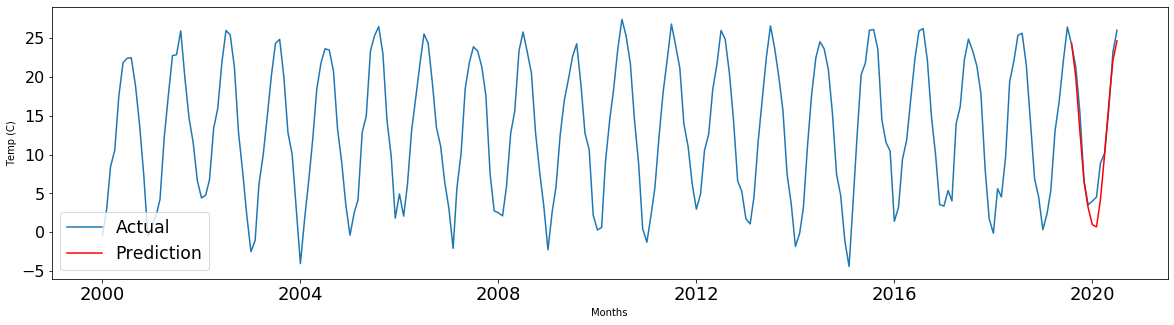

In [55]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Avgtemp'], label='Actual')
plt.plot(df_test.index, df_test['Prediction'], color='r', label='Prediction')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel("Months")
plt.ylabel("Temp (C)")
plt.show()


In [56]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [2.19187322]


In [57]:
train = df

In [59]:
scaler.fit(train)
train = scaler.transform(train)

In [60]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [61]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
40/40 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 2/90
40/40 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 3/90
40/40 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 4/90
40/40 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 5/90
40/40 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 6/90
40/40 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 7/90
40/40 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 8/90
40/40 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 9/90
40/40 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 10/90
40/40 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 11/90
40/40 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 12/90
40/40 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 13/90
40/40 [==============================

In [62]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [63]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [64]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)

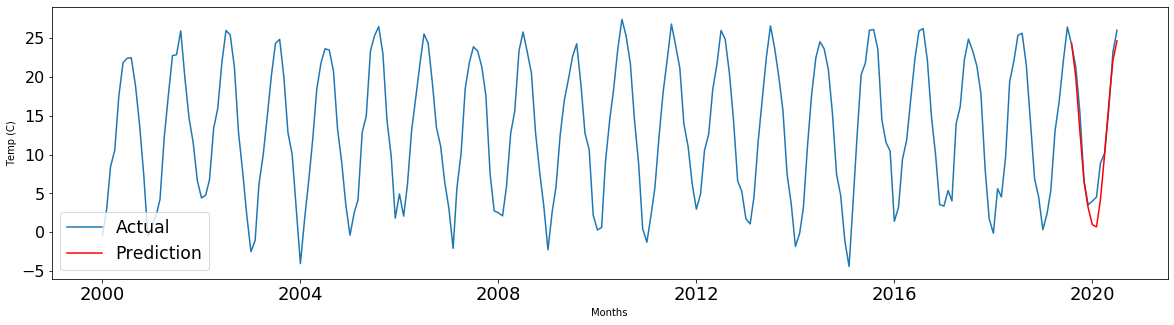

In [65]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Avgtemp'], label='Actual')
plt.plot(df_test.index, df_test['Prediction'], color='r', label='Prediction')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel("Months")
plt.ylabel("Temp (C)")
plt.show()